# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [2]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Econ_0150_Project/'

## Step 0 | Imports and Setup

In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [69]:
# Load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhijitdahatonde/zomato-restaurants-dataset")

data = pd.read_csv(os.path.join(path, 'zomato.csv'))

data.head()

100%|██████████| 181k/181k [00:00<00:00, 41.9MB/s]

Extracting files...


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [89]:
# Data operations here
data.columns

data = data[['rate (out of 5)', 'avg cost (two people)']].dropna()

data['rate (out of 5)'] = pd.to_numeric(data['rate (out of 5)'], errors='coerce')
data['avg cost (two people)'] = pd.to_numeric(data['avg cost (two people)'], errors='coerce')

data = data.dropna()

data = data.rename(columns={
    'rate (out of 5)': 'rating',
    'avg cost (two people)': 'avg_cost'
})


In [90]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

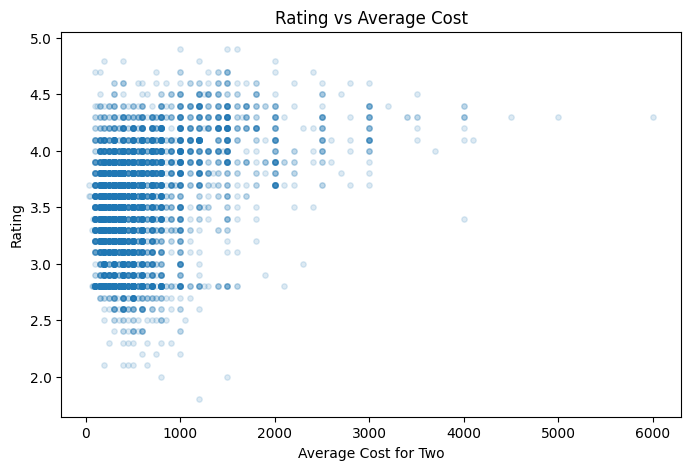

In [91]:
# Exploratory Data Analysis here
data.describe

plt.figure(figsize=(8,5))
plt.scatter(
    data['avg_cost'],
    data['rating'],
    alpha=0.15,
    s=15
)
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.title('Rating vs Average Cost')
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [95]:
# Build and run your model here

#H₀: A restaurant’s average cost has no effect on its customer rating.
#Rating​=β0​+β1​(Average Cost​)+ϵ

model = smf.ols(
    'rating ~ avg_cost',
    data=data
).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1149.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):          2.64e-233
Time:                        09:33:19   Log-Likelihood:                -4006.9
No. Observations:                6984   AIC:                             8018.
Df Residuals:                    6982   BIC:                             8031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3107      0.008    418.785      0.000       3.295       3.326
avg_cost       0.0004   1.11e-05     33.897      0.000       0.000       0.000
==============================================================================
Omnibus:                      114.742   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.245
Skew:                          -0.271   Prob(JB):                     1.90e-24
Kurtosis:                       2.716   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The coefficient = 0.0004 is positive,
#P>|t| = 0.000
#β₁ is statistically different from zero
#If a coefficient is positive and statistically significant, then the relationship is statistically significantly positive.